# Лабораторная работа 4 
Выполнил: Волков Вадим, Б01-007.
Исходный код [здесь](https://github.com/Volkov-Vad1m/ComputationalMath) 
## Ход работы
### Данные

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt



years = [1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000]
people = [92228496, 106021537, 123202624, 132164569, 151325798, 179323175, 203211926, 226545805, 248709873, 281421906]

### Метод Ньютона

In [2]:
class NewtonPolynom:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.coeffs = self.__polynom_coeff(x, y)

#функция подсчета разделенных разностей
    def __polynom_coeff(self, x, y):
        n = len(x)
        coeffs = np.zeros((n, n))

        coeffs[0,:] = y
        
        for i in range(n-1):
            for j in range(n-1-i):
                coeffs[i+1][j] = (coeffs[i][j+1] - coeffs[i][j]) / (x[j+i+1] - x[j])

        return coeffs

#метод задающий полином
    def calc(self, t):
        poly = 1
        value = 0.0

        for i in range(len(self.x)):
            value += self.coeffs[i][0] * poly
            poly = poly * (t - self.x[i])

        return value

Построим график:

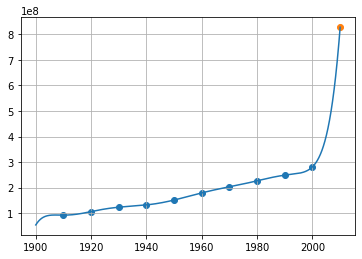

Прогноз на 2010:  827906509


In [3]:
polynom = NewtonPolynom(years, people)

points = np.linspace(1900, 2010, 1000)

plt.scatter(years, people)
plt.scatter(2010, polynom.calc(2010))

plt.plot(points, polynom.calc(points))
plt.grid()
plt.show()
print("Прогноз на 2010: ", round(polynom.calc(2010)))

### Сплайн

In [4]:
class Spline:
    def __init__(self, a, b, c, d, xi):
        self.a = a
        self.b = b
        self.c = c
        self.d = d
        self.xi = xi

    def calc(self, t):
        return self.a  + self.b * (t - self.xi) + self.c * (t - self.xi)**2 + self.d * (t - self.xi)**3       


class Splines:
    def __init__(self, x, y):
        self.x = x
        self.y = y

        self.n = len(x)

        self.splines = [Spline(y[i], 0, 0, 0, x[i]) for i in range(self.n)]

    def __solve_c(self):

        alpha = np.full(self.n-1, 0)
        beta = np.full(self.n-1, 0)

        self.splines[0].c = 0
        self.splines[self.n-1].c = 0

        for i in range(1, self.n-1):
            h_i = self.x[i] - self.x[i-1]
            h_i_1 = self.x[i+1] - self.x[i]

            A_i = h_i
            B_i = 2 * (h_i + h_i_1)
            C_i = h_i_1
            F_i = 3.0 * ((self.y[i + 1] - self.y[i]) / h_i_1 - (self.y[i] - self.y[i - 1]) / h_i)

            alpha[i] = -C_i / (A_i * alpha[i - 1] + B_i)
            beta[i] = (F_i - A_i * beta[i-1]) / (A_i * alpha[i - 1] + B_i)

        for i in range(self.n - 2, 0, -1):
            self.splines[i].c = alpha[i] * self.splines[i + 1].c + beta[i]


    def __solve_b(self):
        for i in range(self.n - 1, 0, -1):
            h_i = self.x[i] - self.x[i - 1]

            self.splines[i].b =  (self.y[i] - self.y[i - 1]) / h_i + h_i * (2*self.splines[i].c + self.splines[i - 1].c) / 3 
        
    def __solve_d(self) -> None:
        for i in range(self.n - 1, 0, -1):
            h_i = self.x[i] - self.x[i - 1]

            self.splines[i].d = (self.splines[i].c - self.splines[i - 1].c) / (3 * h_i)

    def spline_3D(self, target):

        self.__solve_c()
        self.__solve_b()
        self.__solve_d()

        X = np.array([])
        Y = np.array([])
        for i in range(1, self.n):

            if i == 1:
                x_i_dence = np.linspace(min(target), self.x[i], self.x[i] - min(target) + 1)
            elif i == self.n-1:
                x_i_dence = np.linspace(self.x[i-1], max(target), max(target) - self.x[i-1] + 1)
            else:
                x_i_dence = np.linspace(self.x[i-1], self.x[i], 50)

            X = np.concatenate((X, x_i_dence), None)

            y_i_dence = np.array([self.splines[i].calc(x) for x in x_i_dence])
            Y = np.concatenate((Y, y_i_dence), None)

        return X, Y

Построим график:

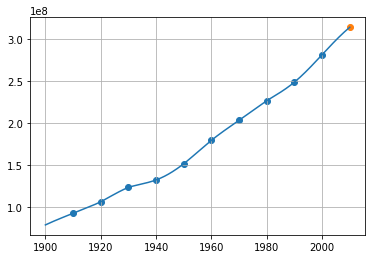

Прогноз на 2010:  314133939


In [5]:
spline = Splines(years, people)
x, y = spline.spline_3D(np.array(range(1900, 2011)))

plt.scatter(years, people)
plt.scatter(2010, y[list(x).index(2010)])
plt.plot(x, y)
plt.grid()
plt.show()
print("Прогноз на 2010: ", round(y[list(x).index(2010)]))

Как мы видим, более точное значение получается при сплайн-экстраполяции